# Aula 03

In [5]:
import pandas as pd

In [6]:
colunas = ['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
           'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'IN_GESTANTE', 'NU_INSCRICAO', 'NU_NOTA_MT','NU_NOTA_REDACAO', 'Q001', 'Q002']
microdadosEnem = pd.read_csv("C:/Users/mykaeull/Desktop/DataScience/analise-dados/DADOS_ENEM/DADOS/MICRODADOS_ENEM_2018.csv", sep=";",
                             encoding="ISO-8859-1", usecols=colunas, nrows=100000)

In [7]:
colunasSelecionadas = ['NU_INSCRICAO', 'NU_NOTA_MT','NU_NOTA_REDACAO', 'Q001', 'Q002']
microdadosEnemSelecionado = microdadosEnem.filter(items=colunasSelecionadas)
microdadosEnemSelecionado = microdadosEnemSelecionado.dropna()

In [8]:
microdadosEnemSelecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
1,180007197856,480.3,280.0,B,B
5,180007239581,538.8,580.0,C,D
7,180008090447,733.8,680.0,A,E
8,180008257068,459.0,340.0,D,D
9,180008202044,525.4,740.0,C,C


In [9]:
q001e002Dict = {
'A': 'Nunca estudou',
'B': 'Não completou a 4ª série/5ª ano do Ensino Fundamental',
'C': 'Completou a 4ª série/5ª ano, mas não completou a 8ª série/9ª ano do Ensino Fundamental',
'D': 'Completou a 8ª série/9ª ano do Ensino Fundamental, mas não completou o Ensino Médio',
'E': 'Completou o Ensino Médio, mas não completou a Faculdade',
'F': 'Completou a Faculdade, mas não completou a Pós-graduação',
'G': 'Completou a Pós-graduação',
'H': 'Não sei'
}

In [10]:
microdadosEnemSelecionado['NO_Q001'] = [q001e002Dict[resp] for resp in microdadosEnemSelecionado.Q001]

In [11]:
microdadosEnemSelecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001
1,180007197856,480.3,280.0,B,B,Não completou a 4ª série/5ª ano do Ensino Fund...
5,180007239581,538.8,580.0,C,D,"Completou a 4ª série/5ª ano, mas não completou..."
7,180008090447,733.8,680.0,A,E,Nunca estudou
8,180008257068,459.0,340.0,D,D,Completou a 8ª série/9ª ano do Ensino Fundamen...
9,180008202044,525.4,740.0,C,C,"Completou a 4ª série/5ª ano, mas não completou..."


Adicionar no dataset

In [12]:
#vezes = microdadosEnemSelecionado['NU_NOTA_MT'].count()

In [13]:
#lista = []
#for x in range(0, vezes):
#    lista.append(x)

In [14]:
#microdadosEnemSelecionado['TESTE'] = lista

In [15]:
#microdadosEnemSelecionado.head()

In [16]:
microdadosEnemSelecionado['NO_Q002'] = [q001e002Dict[resp] for resp in microdadosEnemSelecionado.Q002]

In [17]:
microdadosEnemSelecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002
1,180007197856,480.3,280.0,B,B,Não completou a 4ª série/5ª ano do Ensino Fund...,Não completou a 4ª série/5ª ano do Ensino Fund...
5,180007239581,538.8,580.0,C,D,"Completou a 4ª série/5ª ano, mas não completou...",Completou a 8ª série/9ª ano do Ensino Fundamen...
7,180008090447,733.8,680.0,A,E,Nunca estudou,"Completou o Ensino Médio, mas não completou a ..."
8,180008257068,459.0,340.0,D,D,Completou a 8ª série/9ª ano do Ensino Fundamen...,Completou a 8ª série/9ª ano do Ensino Fundamen...
9,180008202044,525.4,740.0,C,C,"Completou a 4ª série/5ª ano, mas não completou...","Completou a 4ª série/5ª ano, mas não completou..."


In [18]:
microdadosEnemSelecionado.filter(items=['NU_INSCRICAO', 'NO_Q001']).groupby('NO_Q001').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade",18927
Não completou a 4ª série/5ª ano do Ensino Fundamental,17346
"Completou a 4ª série/5ª ano, mas não completou a 8ª série/9ª ano do Ensino Fundamental",10572
"Completou a 8ª série/9ª ano do Ensino Fundamental, mas não completou o Ensino Médio",8788
Não sei,6576
"Completou a Faculdade, mas não completou a Pós-graduação",4480
Nunca estudou,3944
Completou a Pós-graduação,2303


In [19]:
microdadosEnemSelecionado.filter(items=['NU_INSCRICAO', 'NO_Q002']).groupby('NO_Q002').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade",24257
Não completou a 4ª série/5ª ano do Ensino Fundamental,13141
"Completou a 4ª série/5ª ano, mas não completou a 8ª série/9ª ano do Ensino Fundamental",10334
"Completou a 8ª série/9ª ano do Ensino Fundamental, mas não completou o Ensino Médio",10314
"Completou a Faculdade, mas não completou a Pós-graduação",6365
Completou a Pós-graduação,4129
Nunca estudou,2569
Não sei,1827


In [20]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_MT', 'NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
NO_Q001,
Completou a Pós-graduação,639.180156
"Completou a Faculdade, mas não completou a Pós-graduação",611.642567
"Completou o Ensino Médio, mas não completou a Faculdade",552.262239
"Completou a 8ª série/9ª ano do Ensino Fundamental, mas não completou o Ensino Médio",535.420721
"Completou a 4ª série/5ª ano, mas não completou a 8ª série/9ª ano do Ensino Fundamental",525.566487
Não sei,518.210310
Não completou a 4ª série/5ª ano do Ensino Fundamental,508.967041
Nunca estudou,493.972972


In [21]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_MT', 'NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
NO_Q002,
Completou a Pós-graduação,615.229935
"Completou a Faculdade, mas não completou a Pós-graduação",594.896339
"Completou o Ensino Médio, mas não completou a Faculdade",544.250810
"Completou a 8ª série/9ª ano do Ensino Fundamental, mas não completou o Ensino Médio",524.653481
"Completou a 4ª série/5ª ano, mas não completou a 8ª série/9ª ano do Ensino Fundamental",519.275140
Não sei,509.101642
Não completou a 4ª série/5ª ano do Ensino Fundamental,503.694437
Nunca estudou,488.755469


In [22]:
microdadosEnemSelecionado.NU_NOTA_REDACAO.mean()

543.2710869803664

In [23]:
grafico = microdadosEnemSelecionado.filter(items=['NU_NOTA_MT', 'NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_MT', ascending=False)

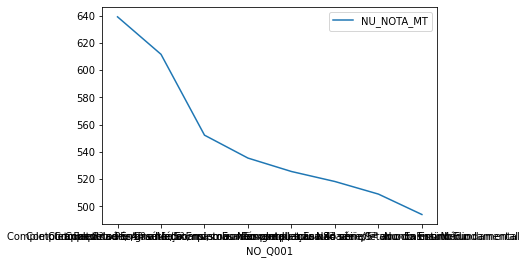

In [24]:
grafico.plot()

In [25]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_MT', 'NO_Q001']).groupby('NO_Q001').describe()

NU_NOTA_MT              \
                                                        count        mean   
NO_Q001                                                                     
Completou a 4ª série/5ª ano, mas não completou ...    10572.0  525.566487   
Completou a 8ª série/9ª ano do Ensino Fundament...     8788.0  535.420721   
Completou a Faculdade, mas não completou a Pós-...     4480.0  611.642567   
Completou a Pós-graduação                              2303.0  639.180156   
Completou o Ensino Médio, mas não completou a F...    18927.0  552.262239   
Nunca estudou                                          3944.0  493.972972   
Não completou a 4ª série/5ª ano do Ensino Funda...    17346.0  508.967041   
Não sei                                                6576.0  518.210310   

                                                                       \
                                                           std    min   
NO_Q001                                                                 
Completou a 4ª série/5ª ano, mas não completou ...   94.252484    0.0   
Completou a 8ª série/9ª ano do Ensino Fundament...   96.962653    0.0   
Completou a Faculdade, mas não completou a Pós-...  118.205942    0.0   
Completou a Pós-graduação                           118.755787  373.1   
Completou o Ensino Médio, mas não completou a F...  104.646176    0.0   
Nunca estudou                                        80.848949  369.6   
Não completou a 4ª série/5ª ano do Ensino Funda...   85.738580    0.0   
Não sei                                              92.267605    0.0   

                                                                              \
                                                        25%     50%      75%   
NO_Q001                                                                        
Completou a 4ª série/5ª ano, mas não completou ...  452.900  510.60  583.950   
Completou a 8ª série/9ª ano do Ensino Fundament...  461.100  520.15  597.500   
Completou a Faculdade, mas não completou a Pós-...  513.925  615.40  705.225   
Completou a Pós-graduação                           541.500  655.00  727.550   
Completou o Ensino Médio, mas não completou a F...  470.600  535.90  627.300   
Nunca estudou                                       433.100  478.60  540.700   
Não completou a 4ª série/5ª ano do Ensino Funda...  443.700  496.40  560.300   
Não sei                                             447.575  502.90  573.100   

                                                           
                                                      max  
NO_Q001                                                    
Completou a 4ª série/5ª ano, mas não completou ...  923.6  
Completou a 8ª série/9ª ano do Ensino Fundament...  967.7  
Completou a Faculdade, mas não completou a Pós-...  979.4  
Completou a Pós-graduação                           993.0  
Completou o Ensino Médio, mas não completou a F...  965.9  
Nunca estudou                                       844.1  
Não completou a 4ª série/5ª ano do Ensino Funda...  884.8  
Não sei                                             992.0

In [34]:
microdadosEnemSelecionado.columns.values

array(['NU_INSCRICAO', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'NO_Q001', 'NO_Q002'], dtype=object)